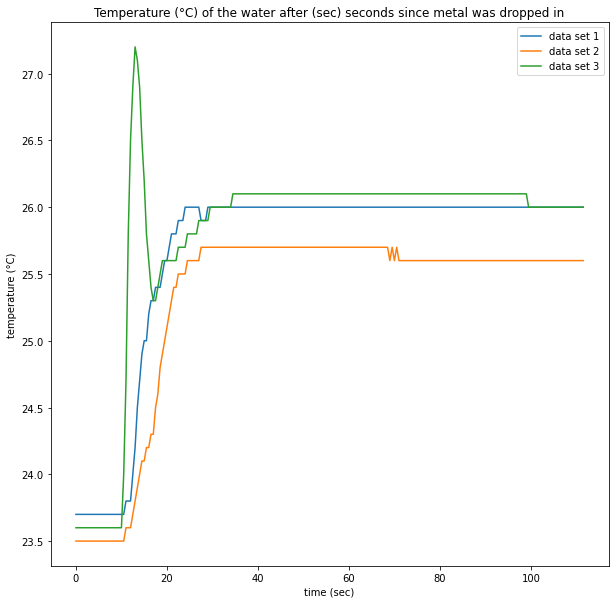

<Figure size 432x288 with 0 Axes>

In [ ]:
from numpy import *
import pandas as pd 
import matplotlib.pyplot as plt

df1 = pd.read_csv("measurement1.txt", delimiter= '\t', index_col=False)
df2 = pd.read_csv("measurement2.txt", delimiter= '\t', index_col=False)
df3 = pd.read_csv("measurement3.txt", delimiter= '\t', index_col=False)



t3 = []
for i in df3["Time (s) Run #1"]:
  t3.append(i)

def f(x):
  L = []
  for v in x["Temperature (°C) Run #1"]:
    if len(L) == len(t3):
      break
    else:
      L.append(v)
  return L

fuc = [f(df1), f(df2), f(df3)]
plt.figure(figsize = (10,10))
for i in range(0,len(fuc)):
  ap = i
  plt.plot(t3, fuc[i], label = "data set {}".format(i+1))
plt.xlabel("time (sec)")
plt.ylabel("temperature (°C)")
plt.title("Temperature (°C) of the water after (sec) seconds since metal was dropped in")
plt.legend()
plt.show()
plt.savefig("uwu.pdf")

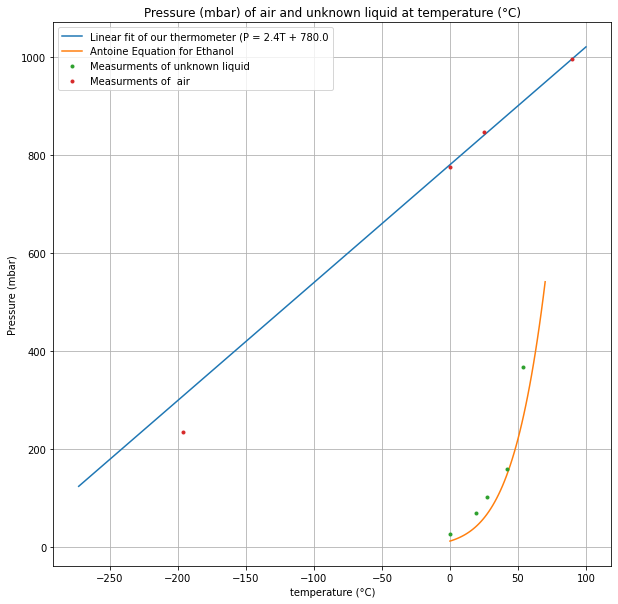

In [ ]:
from numpy import *
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

P1 = [235, 776, 846, 995]
T1 = [-196, 0, 25, 90]
P2 = [26, 70, 102, 158, 368]
T2 = [0, 19, 27, 42, 54]
P = [P1, P2]
T = [T1, T2]
def Q(T):
  A = 8.20417
  B = 1642.89
  C = 230.3
  return 10**(A-B/(C+T))
µ = linspace(0,70)
plt.figure(figsize = (10,10))
P11 = array(P1[1:4])
T11 = array(T1[1:4]).reshape(-1,1)
y = linspace(-273,100)

model = LinearRegression()
model.fit(T11,P11)

def f(x):
  return model.coef_*x + model.intercept_
plt.plot(y,f(y), label = "Linear fit of our thermometer (P = {coef}T + {cons}".format(coef = 2.40, cons = floor(model.intercept_)))
plt.plot(µ, Q(µ), label = "Antoine Equation for Ethanol")
plt.plot(T[1], P[1], ".", label = "Measurments of unknown liquid")
plt.plot(T[0], P[0], ".", label = "Measurments of  air")
plt.ylabel("Pressure (mbar)")
plt.xlabel("temperature (°C)")
plt.title("Pressure (mbar) of air and unknown liquid at temperature (°C)")
plt.legend()
plt.grid()
plt.show()